Note: most of the code are taken from the book _Pro Deep Learning with TensorFlow_. I modified some code at the autoencoder part to understand what's going on.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/rluo/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.InteractiveSession()

In [3]:
a = tf.zeros((2,2))
b = tf.ones((2,2))

In [4]:
tf.reduce_sum(b, reduction_indices = 1).eval()

array([2., 2.], dtype=float32)

In [5]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [6]:
tf.reshape(a, (1, 4)).eval()

array([[0., 0., 0., 0.]], dtype=float32)

In [7]:
a.eval()

array([[0., 0.],
       [0., 0.]], dtype=float32)

In [8]:
a = tf.constant(1)
b = tf.constant(5)
c = a*b

In [9]:
with tf.Session() as sess:
    print(c.eval())
    print(sess.run(c))

5
5


In [10]:
w = tf.Variable(tf.ones(2,2), name='weights')

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[1. 1.]


In [13]:
rw = tf.Variable(tf.random_normal((2,2)), name='random_weights')

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(rw))

[[ 0.02202902 -0.00145234]
 [ 0.27352855 -1.0690036 ]]


In [15]:
var_1 = tf.Variable(0, name='var_1')
add_op = tf.add(var_1, tf.constant(1))
upd_op = tf.assign(var_1, add_op)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        print(sess.run(upd_op))

1
2
3
4
5


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run([upd_op for i in range(5)]))

[1, 1, 1, 1, 1]


In [17]:
x = tf.constant(1)
y = tf.constant(5)
z = tf.constant(7)

mul_x_y = x * y
final_op = mul_x_y + z

with tf.Session() as sess:
    print(sess.run([mul_x_y, final_op]))

[5, 12]


In [18]:
a = np.ones((3, 3))
b = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(b))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [19]:
inp1 = tf.placeholder(tf.float32, shape=(1, 2))
inp2 = tf.placeholder(tf.float32, shape=(2, 1))
output = tf.matmul(inp1, inp2)
with tf.Session() as sess:
    print(sess.run([output], feed_dict = {inp1:[[1, 3]], inp2:[[1], [3]]}))

[array([[10.]], dtype=float32)]


# XOR Implementation

In [31]:
with tf.device('/device:GPU:1'), tf.variable_scope('xor', reuse=tf.AUTO_REUSE):
    x_ = tf.placeholder(tf.float32, shape = [4, 2], name = 'x-input')
    y_ = tf.placeholder(tf.float32, shape = [4, 1], name = 'y-input')
    w1 = tf.Variable(tf.random_uniform([2, 2], -1, 1), name = 'Weights1')
    w2 = tf.Variable(tf.random_uniform([2, 1], -1, 1), name = 'Weights2')
    b1 = tf.Variable(tf.zeros([2]), name = 'Bias1')
    b2 = tf.Variable(tf.zeros([1]), name = 'Bias2')
    z2 = tf.sigmoid(tf.matmul(x_, w1) + b1)
    pred = tf.sigmoid(tf.matmul(z2, w2) + b2)
    cost = tf.reduce_mean(
        ((y_ * tf.log(pred)) + ((1 - y_) * tf.log(1 - pred))) * -1
    )
    learning_rate = 0.01
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [32]:
# Define input data
xor_x = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_y = [[0], [1], [1], [0]]

In [33]:
cost_log = []
pred_log = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(100000):
        sess.run(train_step, feed_dict = {x_: xor_x, y_: xor_y})
        if (i + 1) % 1000 == 0:
            cost_log.append(sess.run(cost, feed_dict = {x_: xor_x, y_: xor_y}))
        if (i + 1) % 1000 == 0:
            pred_log.append(sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y}))
    saver.save(sess, 'xor/xor.chkp')

In [34]:
pred_log = np.array(pred_log)

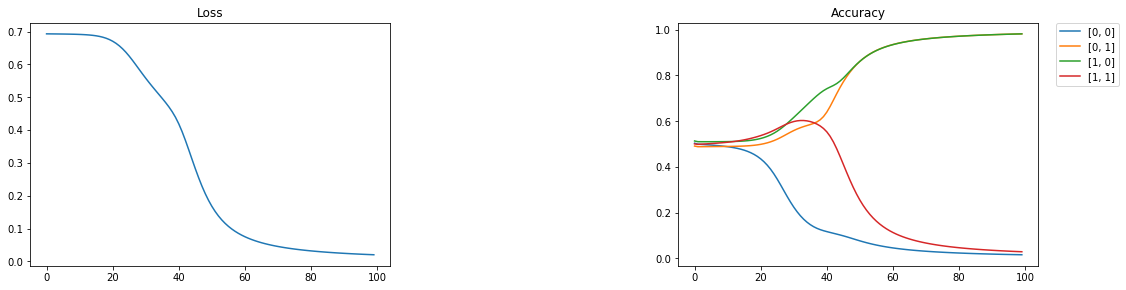

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(cost_log)
plt.title('Loss')
plt.subplot(122)
pred_t = np.array(pred_log)[:, :, 0].transpose()
for i in range(4):
    plt.plot(pred_t[i], label=f'{xor_x[i]}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

In [54]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, 'xor/xor.chkp')
    final_pred = sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y})
    res = {str(xor_x[i]):final_pred[i] for i in range(4)}
    print('Final prediction:')
    for key in res:
        print(f'{key}: {res[key]}')

INFO:tensorflow:Restoring parameters from xor/xor.chkp
Final prediction:
[0, 0]: [0.02470798]
[0, 1]: [0.963015]
[1, 0]: [0.96293]
[1, 1]: [0.03779969]


## XOR with Linear Activation

In [2]:
with tf.device('/device:GPU:1'), tf.variable_scope('xor_linear', reuse=tf.AUTO_REUSE):
    x_ = tf.placeholder(tf.float32, shape = [4, 2], name = 'x-input')
    y_ = tf.placeholder(tf.float32, shape = [4, 1], name = 'y-input')
    w1 = tf.Variable(tf.random_uniform([2, 2], -1, 1), name = 'Weights1')
    w2 = tf.Variable(tf.random_uniform([2, 1], -1, 1), name = 'Weights2')
    b1 = tf.Variable(tf.zeros([2]), name = 'Bias1')
    b2 = tf.Variable(tf.zeros([1]), name = 'Bias2')
    z2 = tf.matmul(x_, w1) + b1
    pred = tf.sigmoid(tf.matmul(z2, w2) + b2)
    cost = tf.reduce_mean(
        ((y_ * tf.log(pred)) + ((1 - y_) * tf.log(1 - pred))) * -1
    )
    learning_rate = 0.01
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [3]:
xor_x = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_y = [[0], [1], [1], [0]]

In [7]:
cost_log = []
pred_log = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(100000):
        sess.run(train_step, feed_dict = {x_: xor_x, y_: xor_y})
        if (i + 1) % 1000 == 0:
            cost_log.append(sess.run(cost, feed_dict = {x_: xor_x, y_: xor_y}))
        if (i + 1) % 1000 == 0:
            pred_log.append(sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y}))
    saver.save(sess, 'xor/xor_linear.chkp')

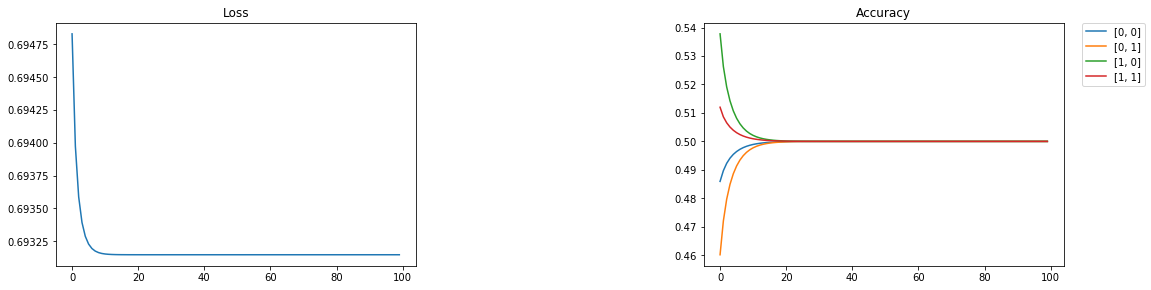

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(cost_log)
plt.title('Loss')
plt.subplot(122)
pred_t = np.array(pred_log)[:, :, 0].transpose()
for i in range(4):
    plt.plot(pred_t[i], label=f'{xor_x[i]}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

In [9]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, 'xor/xor_linear.chkp')
    final_pred = sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y})
    res = {str(xor_x[i]):final_pred[i] for i in range(4)}
    print('Final prediction:')
    for key in res:
        print(f'{key}: {res[key]}')

INFO:tensorflow:Restoring parameters from xor/xor_linear.chkp
Final prediction:
[0, 0]: [0.5]
[0, 1]: [0.5]
[1, 0]: [0.5]
[1, 1]: [0.5]


# MNIST

### Full Batch Gradient Descent

In [10]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [11]:
def read_infile():
    mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
    train_X, train_Y, test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
    return train_X, train_Y, test_X, test_Y

In [12]:
def weights_biases_placeholder(n_dim, n_classes):
    X = tf.placeholder(tf.float32, [None, n_dim]) # None means the dimension is variable
    Y = tf.placeholder(tf.float32, [None, n_classes])
    w = tf.Variable(tf.random_normal([n_dim, n_classes], stddev = 0.01), name = 'weights')
    b = tf.Variable(tf.random_normal([n_classes]), name = 'biases')
    return X, Y, w, b

In [13]:
def forward_pass(w, b, X):
    out = tf.matmul(X, w) + b
    return out

In [14]:
def multiclass_cost(out, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = out, labels = Y))
    return cost

In [15]:
def train_op(learning_rate, cost):
    op_train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    return op_train

In [37]:
train_X, train_Y, test_X, test_Y = read_infile()
with tf.device('/device:GPU:1'), tf.variable_scope('mnist_full_batch_gd', reuse=tf.AUTO_REUSE):
    X, Y, w, b = weights_biases_placeholder(train_X.shape[1], train_Y.shape[1])
    out = forward_pass(w, b, X)
    cost = multiclass_cost(out, Y)
    learning_rate, epochs = 0.01, 1000
    op_train = train_op(learning_rate, cost)
    init = tf.global_variables_initializer()
    
saver = tf.train.Saver()
loss_trace = []
accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [38]:
with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        sess.run(op_train, feed_dict = {X: train_X, Y: train_Y})
        loss_ = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
        accuracy_ = np.mean(
            np.argmax(
                sess.run(out, feed_dict = {X: train_X, Y: train_Y}),
                axis = 1) == np.argmax(train_Y, axis = 1))
        loss_trace.append(loss_)
        accuracy_trace.append(accuracy_)

    print(f'Final training result -- loss: {loss_}, accuracy: {accuracy_}')
    loss_test = sess.run(cost, feed_dict = {X: test_X, Y: test_Y})
    test_pred = np.argmax(sess.run(out, feed_dict = {X: test_X, Y: test_Y}), axis = 1)
    accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis = 1))
    
    saver.save(sess, 'mnist/mnist_full_batch_gd.chkp')
    

Final training result -- loss: 0.6294927000999451, accuracy: 0.847690909090909


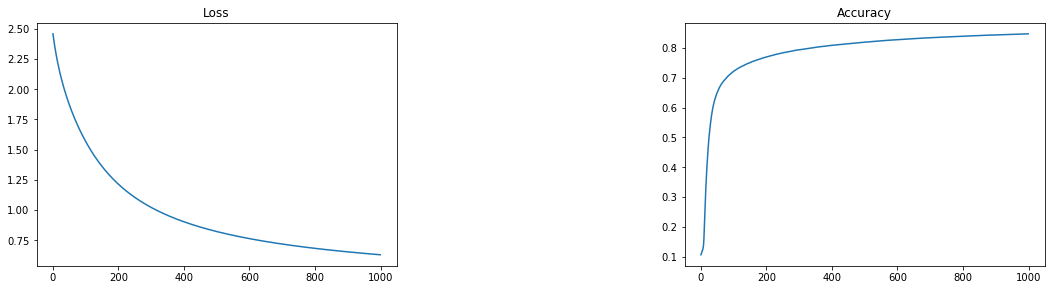

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(loss_trace)
plt.title('Loss')
plt.subplot(122)
plt.plot(accuracy_trace)
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

Actual_digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 2 9]
Actual images of the digits:


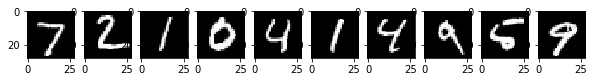

In [22]:
%matplotlib inline
f, a = plt.subplots(1, 10, figsize = (10, 2))
print('Actual_digits:    {}'.format(np.argmax(test_Y[0:10], axis = 1)))
print('Predicted digits: {}'.format(test_pred[0:10]))
print('Actual images of the digits:')
for i in range(10):
    a[i].imshow(np.reshape(test_X[i], (28, 28)), cmap='gray')

### Stochastic Gradient Descent

In [42]:
train_X, train_Y, test_X, test_Y = read_infile()
with tf.device('/device:GPU:1'), tf.variable_scope('mnist_sgd', reuse=tf.AUTO_REUSE):
    X, Y, w, b = weights_biases_placeholder(train_X.shape[1], train_Y.shape[1])
    out = forward_pass(w, b, X)
    cost = multiclass_cost(out, Y)
    learning_rate, epochs, batch_size = 0.01, 1000, 1000
    num_batches = train_X.shape[0] // batch_size
    op_train = train_op(learning_rate, cost)
    init = tf.global_variables_initializer()

saver = tf.train.Saver()
epoch_cost_trace = []
epoch_accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [44]:
with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        epoch_cost, epoch_accuracy = 0, 0

        for j in range(num_batches):
            sess.run(op_train, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                                            Y: train_Y[(j*batch_size):((j+1)*batch_size)]})
            actual_batch_size = train_X[(j*batch_size):((j+1)*batch_size)].shape[0]
            epoch_cost += actual_batch_size * sess.run(
                cost, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                                   Y: train_Y[(j*batch_size):((j+1)*batch_size)]})

        epoch_cost = epoch_cost / float(train_X.shape[0])
        epoch_accuracy = np.mean(
            np.argmax(
                sess.run(out, feed_dict = {X: train_X, Y: train_Y}),
                axis = 1) == np.argmax(train_Y, axis = 1))

        epoch_cost_trace.append(epoch_cost)
        epoch_accuracy_trace.append(epoch_accuracy)

    print(f'Final training result -- Loss: {epoch_cost}, Accuracy: {epoch_accuracy}')
    loss_test = sess.run(cost, feed_dict = {X: test_X, Y: test_Y})
    test_pred = np.argmax(sess.run(out, feed_dict = {X: test_X, Y: test_Y}), axis = 1)
    accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis = 1))
    print(f'results on test dataset -- Loss: {loss_test}, Accuracy: {accuracy_test}')
    
    saver.save(sess, 'mnist/mnist_sgd.chkp')
    

Final training result -- Loss: 0.2841893345117569, Accuracy: 0.9206909090909091
results on test dataset -- Loss: 0.2811605930328369, Accuracy: 0.9207


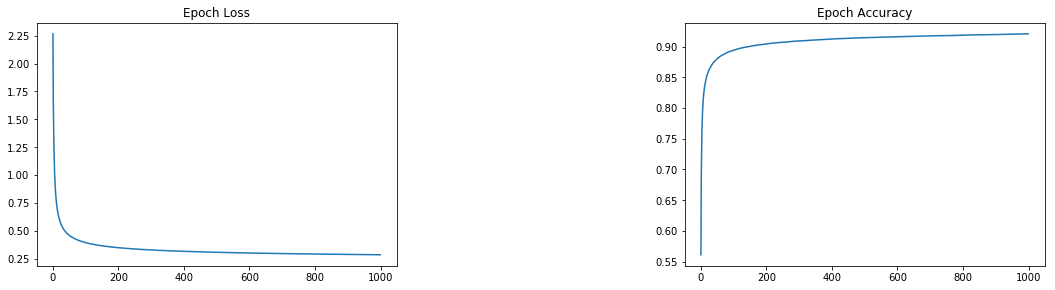

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(epoch_cost_trace)
plt.title('Epoch Loss')
plt.subplot(122)
plt.plot(epoch_accuracy_trace)
plt.title('Epoch Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

Actual_digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]
Actual images of the digits:


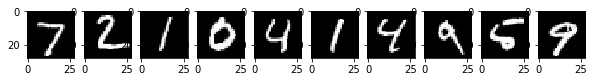

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize = (10, 2))
print('Actual_digits:    {}'.format(np.argmax(test_Y[0:10], axis = 1)))
print('Predicted digits: {}'.format(test_pred[0:10]))
print('Actual images of the digits:')
for j in range(10):
    a[j].imshow(np.reshape(test_X[j], (28, 28)), cmap='gray')

### MLP with SGD + Momentum

In [51]:
def mlp_weights_biases_placeholder(n_dim, n_hidden, n_classes):
    num_layers = len(n_hidden)
    X = tf.placeholder(tf.float32, [None, n_dim]) # None means the dimension is variable
    Y = tf.placeholder(tf.float32, [None, n_classes])
    w = []
    b = []
    w.append(tf.Variable(tf.random_normal([n_dim, n_hidden[0]], stddev = 0.01), name = 'W0'))
    b.append(tf.Variable(tf.random_normal([n_hidden[0]]), name = 'b0'))
    if len(n_hidden) > 1:
        for i in range(1, num_layers):
            w.append(tf.Variable(tf.random_normal([n_hidden[i-1], n_hidden[i]], stddev = 0.01), name = f'W{i}'))
            b.append(tf.Variable(tf.random_normal([n_hidden[i]]), name = f'b{i}'))
    w.append(tf.Variable(tf.random_normal([n_hidden[num_layers - 1], n_classes], stddev = 0.01), name = f'W{num_layers}'))
    b.append(tf.Variable(tf.random_normal([n_classes]), name = f'b{num_layers}'))
    return X, Y, w, b

In [52]:
def mlp_forward_pass(w, b, X):
    assert len(w) == len(b)
    out = X
    for i in range(len(w) - 1):
        out = tf.matmul(out, w[i]) + b[i]
        out = tf.nn.relu(out)
    out = tf.matmul(out, w[len(w) - 1]) + b[len(w) - 1]
    return out

In [53]:
def mlp_train_op(learning_rate, momentum, cost):
    op_train = tf.train.MomentumOptimizer(
        learning_rate = learning_rate, momentum = momentum, use_nesterov = True).minimize(cost)
    return op_train

In [54]:
train_X, train_Y, test_X, test_Y = read_infile()
with tf.device('/device:GPU:1'), tf.variable_scope('mnist_mlp_momentum', reuse=tf.AUTO_REUSE):
    X, Y, w, b = mlp_weights_biases_placeholder(train_X.shape[1], [64, 16], train_Y.shape[1])
    out = mlp_forward_pass(w, b, X)
    cost = multiclass_cost(out, Y)
    learning_rate, momentum, epochs, batch_size = 0.01, 0.9, 1000, 1000
    num_batches = train_X.shape[0] // batch_size
    op_train = train_op(learning_rate, cost)
    init = tf.global_variables_initializer()
    
saver = tf.train.Saver()
epoch_cost_trace = []
epoch_accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [55]:
with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        epoch_cost, epoch_accuracy = 0, 0

        for j in range(num_batches):
            sess.run(op_train, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                                            Y: train_Y[(j*batch_size):((j+1)*batch_size)]})
            actual_batch_size = train_X[(j*batch_size):((j+1)*batch_size)].shape[0]
            epoch_cost += actual_batch_size * sess.run(
                cost, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                                   Y: train_Y[(j*batch_size):((j+1)*batch_size)]})

        epoch_cost = epoch_cost/float(train_X.shape[0])
        epoch_accuracy = np.mean(
            np.argmax(
                sess.run(out, feed_dict = {X: train_X, Y: train_Y}),
                axis = 1) == np.argmax(train_Y, axis = 1))

        epoch_cost_trace.append(epoch_cost)
        epoch_accuracy_trace.append(epoch_accuracy)

    print(f'Final training result -- Loss: {epoch_cost}, Accuracy: {epoch_accuracy}')
    loss_test = sess.run(cost, feed_dict = {X: test_X, Y: test_Y})
    test_pred = np.argmax(sess.run(out, feed_dict = {X: test_X, Y: test_Y}), axis = 1)
    accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis = 1))
    print(f'results on test dataset -- Loss: {loss_test}, Accuracy: {accuracy_test}')

    saver.save(sess, 'mnist/mnist_mlp_momentum.chkp')

Final training result -- Loss: 0.08803557035597888, Accuracy: 0.9743636363636363
results on test dataset -- Loss: 0.1346062272787094, Accuracy: 0.9613


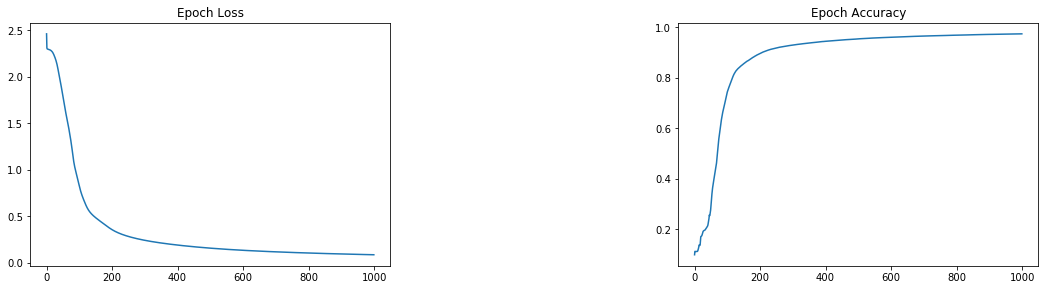

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(epoch_cost_trace)
plt.title('Epoch Loss')
plt.subplot(122)
plt.plot(epoch_accuracy_trace)
plt.title('Epoch Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

Actual_digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]
Actual images of the digits:


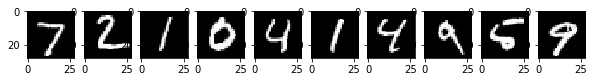

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize = (10, 2))
print('Actual_digits:    {}'.format(np.argmax(test_Y[0:10], axis = 1)))
print('Predicted digits: {}'.format(test_pred[0:10]))
print('Actual images of the digits:')
for j in range(10):
    a[j].imshow(np.reshape(test_X[j], (28, 28)), cmap='gray')